In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
tsd = pd.read_csv('Terry_Stops.csv')
tsd.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


In [3]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45196 entries, 0 to 45195
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         45196 non-null  object
 1   Subject ID                45196 non-null  int64 
 2   GO / SC Num               45196 non-null  int64 
 3   Terry Stop ID             45196 non-null  int64 
 4   Stop Resolution           45196 non-null  object
 5   Weapon Type               45196 non-null  object
 6   Officer ID                45196 non-null  object
 7   Officer YOB               45196 non-null  int64 
 8   Officer Gender            45196 non-null  object
 9   Officer Race              45196 non-null  object
 10  Subject Perceived Race    45196 non-null  object
 11  Subject Perceived Gender  45196 non-null  object
 12  Reported Date             45196 non-null  object
 13  Reported Time             45196 non-null  object
 14  Initial Call Type     

In [4]:
tsd['Stop Resolution'].value_counts()

Field Contact               18199
Offense Report              15174
Arrest                      10919
Referred for Prosecution      728
Citation / Infraction         176
Name: Stop Resolution, dtype: int64

In [5]:
tsd['Frisk Flag'].value_counts()

N    34660
Y    10058
-      478
Name: Frisk Flag, dtype: int64

In [6]:
tsd['Arrest Flag'].value_counts()

N    42485
Y     2711
Name: Arrest Flag, dtype: int64

In [7]:
tsd['Officer Race'].value_counts()

White                            34357
Hispanic or Latino                2572
Two or More Races                 2514
Asian                             1886
Black or African American         1800
Not Specified                     1248
Nat Hawaiian/Oth Pac Islander      441
American Indian/Alaska Native      314
Unknown                             64
Name: Officer Race, dtype: int64

In [8]:
tsd['Subject ID'].value_counts()

-1              34714
 7726859935        19
 7753260438        13
 7727117712        12
 7727600619         9
                ...  
 7725797630         1
 16168302851        1
 7704469768         1
 7733768490         1
 16219707395        1
Name: Subject ID, Length: 8172, dtype: int64

In [9]:
tsd['Weapon Type'].value_counts()

None                                 32565
-                                    10000
Lethal Cutting Instrument             1482
Knife/Cutting/Stabbing Instrument      520
Handgun                                281
Firearm Other                          100
Blunt Object/Striking Implement         69
Club, Blackjack, Brass Knuckles         49
Firearm                                 34
Mace/Pepper Spray                       21
Other Firearm                           19
Firearm (unk type)                      15
Club                                     9
Taser/Stun Gun                           7
None/Not Applicable                      7
Rifle                                    7
Fire/Incendiary Device                   4
Shotgun                                  3
Automatic Handgun                        2
Brass Knuckles                           1
Blackjack                                1
Name: Weapon Type, dtype: int64

In [10]:
tsd['Subject Age Group'].value_counts()

26 - 35         15011
36 - 45          9530
18 - 25          9148
46 - 55          5834
56 and Above     2294
1 - 17           1937
-                1442
Name: Subject Age Group, dtype: int64

In [11]:
tsd['Officer YOB'].value_counts()

1986    3180
1987    2893
1984    2678
1991    2610
1985    2430
1992    2289
1990    2152
1988    1998
1989    1925
1982    1823
1983    1671
1979    1452
1981    1376
1993    1343
1971    1213
1978    1126
1995     998
1976     986
1977     982
1973     901
1994     829
1980     789
1967     707
1968     623
1970     579
1974     548
1969     530
1996     523
1975     521
1962     452
1972     415
1965     414
1964     412
1997     339
1963     256
1966     223
1958     218
1961     208
1959     174
1960     161
1900      64
1954      44
1957      43
1953      32
1955      21
1956      17
1948      11
1952       9
1949       5
1946       2
1951       1
Name: Officer YOB, dtype: int64

In [12]:
tsd['Reported Date'].value_counts()

2015-10-01T00:00:00    101
2015-09-29T00:00:00     66
2015-05-28T00:00:00     57
2015-07-18T00:00:00     55
2019-04-26T00:00:00     54
                      ... 
2015-03-15T00:00:00      1
2015-05-06T00:00:00      1
2015-05-10T00:00:00      1
2015-03-28T00:00:00      1
2015-05-13T00:00:00      1
Name: Reported Date, Length: 2094, dtype: int64

In [13]:
tsd['Subject Perceived Race'].value_counts()

White                                        22092
Black or African American                    13458
Unknown                                       2411
-                                             1787
Hispanic                                      1684
Asian                                         1449
American Indian or Alaska Native              1311
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       43
Name: Subject Perceived Race, dtype: int64

In [14]:
tsd['Subject Perceived Gender'].value_counts()

Male                                                         35343
Female                                                        9233
Unable to Determine                                            326
-                                                              269
Unknown                                                         21
Gender Diverse (gender non-conforming and/or transgender)        4
Name: Subject Perceived Gender, dtype: int64

In [15]:
tsd['Initial Call Type'].value_counts()

-                                                 13064
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         2969
SUSPICIOUS PERSON, VEHICLE OR INCIDENT             2835
DISTURBANCE, MISCELLANEOUS/OTHER                   2319
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)     1910
                                                  ...  
MISSING - ADULT                                       1
TRACKING ALARM                                        1
INJURED -  PERSON/INDUSTRIAL ACCIDENT                 1
VICE - PORNOGRAPHY                                    1
WARRANT PICKUP - FROM OTHER AGENCY                    1
Name: Initial Call Type, Length: 166, dtype: int64

In [16]:
tsd['Final Call Type'].value_counts()

-                                               13064
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON         3523
--PROWLER - TRESPASS                             3165
--DISTURBANCE - OTHER                            2576
--ASSAULTS, OTHER                                2197
                                                ...  
THEFT OF SERVICES                                   1
UNDERCOVER OPS, CAUTION (INCLUDES STAKEOUTS)        1
NARCOTICS WARRANT SERVICE                           1
SHOTS -DELAY/INCLUDES HEARD/NO ASSAULT              1
WARRANT PICKUP - FROM OTHER AGENCY                  1
Name: Final Call Type, Length: 205, dtype: int64

In [17]:
tsd['Call Type'].value_counts()

911                              20092
-                                13064
ONVIEW                            8588
TELEPHONE OTHER, NOT 911          3146
ALARM CALL (NOT POLICE ALARM)      298
TEXT MESSAGE                         7
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

In [18]:
tsd['Officer Squad'].value_counts()

TRAINING - FIELD TRAINING SQUAD          4802
WEST PCT 1ST W - DAVID/MARY              1476
WEST PCT 2ND W - D/M RELIEF               980
SOUTHWEST PCT 2ND W - FRANK               911
NORTH PCT 2ND WATCH - NORTH BEATS         885
                                         ... 
ZOLD CRIME ANALYSIS UNIT - ANALYSTS         1
TRAINING - LEARNING MANAGEMENT SYSTEM       1
VICE - GENERAL INVESTIGATIONS SQUAD         1
SOUTHWEST PCT OPS - BURG/THEFT              1
RECORDS - DAY SHIFT                         1
Name: Officer Squad, Length: 169, dtype: int64

In [19]:
tsd.isnull().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               584
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [20]:
tsd['Precinct'].value_counts()

West         10715
North         9937
-             9750
East          5978
South         5404
Southwest     2320
SouthWest      847
Unknown        200
OOJ             30
FK ERROR        15
Name: Precinct, dtype: int64

In [21]:
# Columns to drop
# Subject ID / GO/SC Num / Terry Stop ID / Officer ID / Officer Gender / Officer YOB / Subject Perceived Gender
# Initial Call Type / Final Call Type / Officer Squad / Precint / Sector / Beat

# Columns to clean-up or adjust
# Weapon Type / Reported Date / Subject Perceived Race / Reported Time / Call Type


# Feature Engineering to Consider
# 

# Possible Target Variables to predict
# Stop Resolution / Frisk Flag

In [22]:
tsd = tsd.drop(['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Officer Gender', 'Officer YOB',
         'Subject Perceived Gender', 'Initial Call Type', 'Final Call Type', 'Officer Squad', 'Precinct',
         'Sector', 'Beat'], axis=1)

In [23]:
tsd.head()

,Subject Age Group,Stop Resolution,Weapon Type,Officer Race,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag,Frisk Flag
0,-,Arrest,None,Black or African American,Asian,2015-10-16T00:00:00,11:32:00,-,N,N
1,-,Field Contact,None,White,-,2015-03-19T00:00:00,07:59:00,-,N,N
2,-,Field Contact,None,White,White,2015-03-21T00:00:00,19:12:00,-,N,-
3,-,Field Contact,None,White,-,2015-04-01T00:00:00,04:55:00,-,N,N
4,-,Field Contact,None,White,Black or African American,2015-04-03T00:00:00,00:41:00,-,N,N


In [24]:
tsd['Subject Age Group'].value_counts()

26 - 35         15011
36 - 45          9530
18 - 25          9148
46 - 55          5834
56 and Above     2294
1 - 17           1937
-                1442
Name: Subject Age Group, dtype: int64

In [25]:
tsd = tsd.drop('Weapon Type', axis=1)

In [26]:
tsd.head()

,Subject Age Group,Stop Resolution,Officer Race,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag,Frisk Flag
0,-,Arrest,Black or African American,Asian,2015-10-16T00:00:00,11:32:00,-,N,N
1,-,Field Contact,White,-,2015-03-19T00:00:00,07:59:00,-,N,N
2,-,Field Contact,White,White,2015-03-21T00:00:00,19:12:00,-,N,-
3,-,Field Contact,White,-,2015-04-01T00:00:00,04:55:00,-,N,N
4,-,Field Contact,White,Black or African American,2015-04-03T00:00:00,00:41:00,-,N,N


In [27]:
tsd.drop(['Arrest Flag', 'Stop Resolution'], axis=1)

,Subject Age Group,Officer Race,Subject Perceived Race,Reported Date,Reported Time,Call Type,Frisk Flag
0,-,Black or African American,Asian,2015-10-16T00:00:00,11:32:00,-,N
1,-,White,-,2015-03-19T00:00:00,07:59:00,-,N
2,-,White,White,2015-03-21T00:00:00,19:12:00,-,-
3,-,White,-,2015-04-01T00:00:00,04:55:00,-,N
4,-,White,Black or African American,2015-04-03T00:00:00,00:41:00,-,N
...,...,...,...,...,...,...,...
45191,56 and Above,White,White,2020-11-11T00:00:00,02:22:45,ONVIEW,N
45192,56 and Above,Asian,White,2020-11-17T00:00:00,18:52:12,911,N
45193,56 and Above,White,White,2020-11-24T00:00:00,16:38:00,"TELEPHONE OTHER, NOT 911",N
45194,56 and Above,White,Unknown,2020-11-25T00:00:00,11:16:36,911,N


In [28]:
tsd

,Subject Age Group,Stop Resolution,Officer Race,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag,Frisk Flag
0,-,Arrest,Black or African American,Asian,2015-10-16T00:00:00,11:32:00,-,N,N
1,-,Field Contact,White,-,2015-03-19T00:00:00,07:59:00,-,N,N
2,-,Field Contact,White,White,2015-03-21T00:00:00,19:12:00,-,N,-
3,-,Field Contact,White,-,2015-04-01T00:00:00,04:55:00,-,N,N
4,-,Field Contact,White,Black or African American,2015-04-03T00:00:00,00:41:00,-,N,N
...,...,...,...,...,...,...,...,...,...
45191,56 and Above,Field Contact,White,White,2020-11-11T00:00:00,02:22:45,ONVIEW,N,N
45192,56 and Above,Arrest,Asian,White,2020-11-17T00:00:00,18:52:12,911,Y,N
45193,56 and Above,Field Contact,White,White,2020-11-24T00:00:00,16:38:00,"TELEPHONE OTHER, NOT 911",N,N
45194,56 and Above,Field Contact,White,Unknown,2020-11-25T00:00:00,11:16:36,911,N,N


In [29]:
tsd = tsd.replace('-', 'Not Reported')

,Subject Age Group,Stop Resolution,Officer Race,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag,Frisk Flag
0,-,Arrest,Black or African American,Asian,2015-10-16T00:00:00,11:32:00,-,N,N
1,-,Field Contact,White,-,2015-03-19T00:00:00,07:59:00,-,N,N
2,-,Field Contact,White,White,2015-03-21T00:00:00,19:12:00,-,N,-
3,-,Field Contact,White,-,2015-04-01T00:00:00,04:55:00,-,N,N
4,-,Field Contact,White,Black or African American,2015-04-03T00:00:00,00:41:00,-,N,N
...,...,...,...,...,...,...,...,...,...
45191,56 and Above,Field Contact,White,White,2020-11-11T00:00:00,02:22:45,ONVIEW,N,N
45192,56 and Above,Arrest,Asian,White,2020-11-17T00:00:00,18:52:12,911,Y,N
45193,56 and Above,Field Contact,White,White,2020-11-24T00:00:00,16:38:00,"TELEPHONE OTHER, NOT 911",N,N
45194,56 and Above,Field Contact,White,Unknown,2020-11-25T00:00:00,11:16:36,911,N,N


In [280]:
y = tsd['Frisk Flag']
X = tsd.drop('Frisk Flag', axis=1)

In [31]:
X

,Subject Age Group,Stop Resolution,Officer Race,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag
0,-,Arrest,Black or African American,Asian,2015-10-16T00:00:00,11:32:00,-,N
1,-,Field Contact,White,-,2015-03-19T00:00:00,07:59:00,-,N
2,-,Field Contact,White,White,2015-03-21T00:00:00,19:12:00,-,N
3,-,Field Contact,White,-,2015-04-01T00:00:00,04:55:00,-,N
4,-,Field Contact,White,Black or African American,2015-04-03T00:00:00,00:41:00,-,N
...,...,...,...,...,...,...,...,...
45191,56 and Above,Field Contact,White,White,2020-11-11T00:00:00,02:22:45,ONVIEW,N
45192,56 and Above,Arrest,Asian,White,2020-11-17T00:00:00,18:52:12,911,Y
45193,56 and Above,Field Contact,White,White,2020-11-24T00:00:00,16:38:00,"TELEPHONE OTHER, NOT 911",N
45194,56 and Above,Field Contact,White,Unknown,2020-11-25T00:00:00,11:16:36,911,N


In [32]:
X = X.replace('-', 'Not Reported')

In [33]:
X['Subject Age Group'].value_counts()

26 - 35         15011
36 - 45          9530
18 - 25          9148
46 - 55          5834
56 and Above     2294
1 - 17           1937
Not Reported     1442
Name: Subject Age Group, dtype: int64

In [34]:
X

,Subject Age Group,Stop Resolution,Officer Race,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag
0,Not Reported,Arrest,Black or African American,Asian,2015-10-16T00:00:00,11:32:00,Not Reported,N
1,Not Reported,Field Contact,White,Not Reported,2015-03-19T00:00:00,07:59:00,Not Reported,N
2,Not Reported,Field Contact,White,White,2015-03-21T00:00:00,19:12:00,Not Reported,N
3,Not Reported,Field Contact,White,Not Reported,2015-04-01T00:00:00,04:55:00,Not Reported,N
4,Not Reported,Field Contact,White,Black or African American,2015-04-03T00:00:00,00:41:00,Not Reported,N
...,...,...,...,...,...,...,...,...
45191,56 and Above,Field Contact,White,White,2020-11-11T00:00:00,02:22:45,ONVIEW,N
45192,56 and Above,Arrest,Asian,White,2020-11-17T00:00:00,18:52:12,911,Y
45193,56 and Above,Field Contact,White,White,2020-11-24T00:00:00,16:38:00,"TELEPHONE OTHER, NOT 911",N
45194,56 and Above,Field Contact,White,Unknown,2020-11-25T00:00:00,11:16:36,911,N


In [35]:
X = X.drop('Officer Race', axis=1)

In [36]:
X

,Subject Age Group,Stop Resolution,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag
0,Not Reported,Arrest,Asian,2015-10-16T00:00:00,11:32:00,Not Reported,N
1,Not Reported,Field Contact,Not Reported,2015-03-19T00:00:00,07:59:00,Not Reported,N
2,Not Reported,Field Contact,White,2015-03-21T00:00:00,19:12:00,Not Reported,N
3,Not Reported,Field Contact,Not Reported,2015-04-01T00:00:00,04:55:00,Not Reported,N
4,Not Reported,Field Contact,Black or African American,2015-04-03T00:00:00,00:41:00,Not Reported,N
...,...,...,...,...,...,...,...
45191,56 and Above,Field Contact,White,2020-11-11T00:00:00,02:22:45,ONVIEW,N
45192,56 and Above,Arrest,White,2020-11-17T00:00:00,18:52:12,911,Y
45193,56 and Above,Field Contact,White,2020-11-24T00:00:00,16:38:00,"TELEPHONE OTHER, NOT 911",N
45194,56 and Above,Field Contact,Unknown,2020-11-25T00:00:00,11:16:36,911,N


In [37]:
# Feature engineering for time

# Morning 6 - noon
# Afternoon noon - 6
# Evening 6 - midnight
# Overnight midnight - 6

In [38]:
# Feature engineering for date

# Q1
# Q2
# Q3
# Q4
# Remove timestamp info from entries

In [39]:
# Other changes

# Replace ' ' with '.' in columns

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45196 entries, 0 to 45195
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Subject Age Group       45196 non-null  object
 1   Stop Resolution         45196 non-null  object
 2   Subject Perceived Race  45196 non-null  object
 3   Reported Date           45196 non-null  object
 4   Reported Time           45196 non-null  object
 5   Call Type               45196 non-null  object
 6   Arrest Flag             45196 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


In [41]:
X['Reported_Date'] = [i[0:10] for i in X['Reported Date']]

In [42]:
X.head()

,Subject Age Group,Stop Resolution,Subject Perceived Race,Reported Date,Reported Time,Call Type,Arrest Flag,Reported_Date
0,Not Reported,Arrest,Asian,2015-10-16T00:00:00,11:32:00,Not Reported,N,2015-10-16
1,Not Reported,Field Contact,Not Reported,2015-03-19T00:00:00,07:59:00,Not Reported,N,2015-03-19
2,Not Reported,Field Contact,White,2015-03-21T00:00:00,19:12:00,Not Reported,N,2015-03-21
3,Not Reported,Field Contact,Not Reported,2015-04-01T00:00:00,04:55:00,Not Reported,N,2015-04-01
4,Not Reported,Field Contact,Black or African American,2015-04-03T00:00:00,00:41:00,Not Reported,N,2015-04-03


In [43]:
X = X.drop('Reported Date', axis=1)

In [44]:
X.head()

,Subject Age Group,Stop Resolution,Subject Perceived Race,Reported Time,Call Type,Arrest Flag,Reported_Date
0,Not Reported,Arrest,Asian,11:32:00,Not Reported,N,2015-10-16
1,Not Reported,Field Contact,Not Reported,07:59:00,Not Reported,N,2015-03-19
2,Not Reported,Field Contact,White,19:12:00,Not Reported,N,2015-03-21
3,Not Reported,Field Contact,Not Reported,04:55:00,Not Reported,N,2015-04-01
4,Not Reported,Field Contact,Black or African American,00:41:00,Not Reported,N,2015-04-03


In [45]:
X['Reported_Hour'] = [i[0:2] for i in X['Reported Time']]

In [46]:
X.head()

,Subject Age Group,Stop Resolution,Subject Perceived Race,Reported Time,Call Type,Arrest Flag,Reported_Date,Reported_Hour
0,Not Reported,Arrest,Asian,11:32:00,Not Reported,N,2015-10-16,11
1,Not Reported,Field Contact,Not Reported,07:59:00,Not Reported,N,2015-03-19,07
2,Not Reported,Field Contact,White,19:12:00,Not Reported,N,2015-03-21,19
3,Not Reported,Field Contact,Not Reported,04:55:00,Not Reported,N,2015-04-01,04
4,Not Reported,Field Contact,Black or African American,00:41:00,Not Reported,N,2015-04-03,00


In [47]:
X = X.drop('Arrest Flag', axis=1)

In [48]:
ov = ['00','01','02','03','04','05']
mo = ['06','07','08','09','10','11']
af = ['12','13','14','15','16','17']
ev = ['18','19','20','21','22','23']

In [49]:
X.head()

,Subject Age Group,Stop Resolution,Subject Perceived Race,Reported Time,Call Type,Reported_Date,Reported_Hour
0,Not Reported,Arrest,Asian,11:32:00,Not Reported,2015-10-16,11
1,Not Reported,Field Contact,Not Reported,07:59:00,Not Reported,2015-03-19,07
2,Not Reported,Field Contact,White,19:12:00,Not Reported,2015-03-21,19
3,Not Reported,Field Contact,Not Reported,04:55:00,Not Reported,2015-04-01,04
4,Not Reported,Field Contact,Black or African American,00:41:00,Not Reported,2015-04-03,00


In [50]:
for i in X['Reported_Hour']:
    if i in ov:
        X['Reported_Hour'] = X['Reported_Hour'].replace(i, 'OV')
    if i in mo:
        X['Reported_Hour'] = X['Reported_Hour'].replace(i, 'MO')
    if i in af:
        X['Reported_Hour'] = X['Reported_Hour'].replace(i, 'AF')
    if i in ev:
        X['Reported_Hour'] = X['Reported_Hour'].replace(i, 'EV')

In [51]:
X.head()

,Subject Age Group,Stop Resolution,Subject Perceived Race,Reported Time,Call Type,Reported_Date,Reported_Hour
0,Not Reported,Arrest,Asian,11:32:00,Not Reported,2015-10-16,MO
1,Not Reported,Field Contact,Not Reported,07:59:00,Not Reported,2015-03-19,MO
2,Not Reported,Field Contact,White,19:12:00,Not Reported,2015-03-21,EV
3,Not Reported,Field Contact,Not Reported,04:55:00,Not Reported,2015-04-01,OV
4,Not Reported,Field Contact,Black or African American,00:41:00,Not Reported,2015-04-03,OV


In [52]:
X = X.drop('Stop Resolution', axis=1)

In [53]:
X['Time_Of_Day'] = X['Reported_Hour']

In [54]:
X = X.drop(['Reported_Hour', 'Reported Time'], axis=1)

In [55]:
X.head()

,Subject Age Group,Subject Perceived Race,Call Type,Reported_Date,Time_Of_Day
0,Not Reported,Asian,Not Reported,2015-10-16,MO
1,Not Reported,Not Reported,Not Reported,2015-03-19,MO
2,Not Reported,White,Not Reported,2015-03-21,EV
3,Not Reported,Not Reported,Not Reported,2015-04-01,OV
4,Not Reported,Black or African American,Not Reported,2015-04-03,OV


In [56]:
X.Time_Of_Day.value_counts()

EV    12339
OV    12129
AF    12021
MO     8707
Name: Time_Of_Day, dtype: int64

In [57]:
Q1 = ['01','02','03']
Q2 = ['04','05','06']
Q3 = ['07','08','09']
Q4 = ['10','11','12']

X['Reported_Quarter'] = [i[5:7] for i in X['Reported_Date']]

for i in X['Reported_Quarter']:
    if i in Q1:
        X['Reported_Quarter'] = X['Reported_Quarter'].replace(i, 'Q1')
    if i in Q2:
        X['Reported_Quarter'] = X['Reported_Quarter'].replace(i, 'Q2')
    if i in Q3:
        X['Reported_Quarter'] = X['Reported_Quarter'].replace(i, 'Q3')
    if i in Q4:
        X['Reported_Quarter'] = X['Reported_Quarter'].replace(i, 'Q4')

In [58]:
X.head()

,Subject Age Group,Subject Perceived Race,Call Type,Reported_Date,Time_Of_Day,Reported_Quarter
0,Not Reported,Asian,Not Reported,2015-10-16,MO,Q4
1,Not Reported,Not Reported,Not Reported,2015-03-19,MO,Q1
2,Not Reported,White,Not Reported,2015-03-21,EV,Q1
3,Not Reported,Not Reported,Not Reported,2015-04-01,OV,Q2
4,Not Reported,Black or African American,Not Reported,2015-04-03,OV,Q2


In [59]:
X['Reported_Year'] = [i[0:4] for i in X['Reported_Date']]

In [60]:
X.head()

,Subject Age Group,Subject Perceived Race,Call Type,Reported_Date,Time_Of_Day,Reported_Quarter,Reported_Year
0,Not Reported,Asian,Not Reported,2015-10-16,MO,Q4,2015
1,Not Reported,Not Reported,Not Reported,2015-03-19,MO,Q1,2015
2,Not Reported,White,Not Reported,2015-03-21,EV,Q1,2015
3,Not Reported,Not Reported,Not Reported,2015-04-01,OV,Q2,2015
4,Not Reported,Black or African American,Not Reported,2015-04-03,OV,Q2,2015


In [61]:
X.Reported_Year.value_counts()

2018    8883
2019    8248
2016    7715
2017    7488
2015    7059
2020    5803
Name: Reported_Year, dtype: int64

In [62]:
X = X.drop('Reported_Date', axis=1)

In [63]:
X

,Subject Age Group,Subject Perceived Race,Call Type,Time_Of_Day,Reported_Quarter,Reported_Year
0,Not Reported,Asian,Not Reported,MO,Q4,2015
1,Not Reported,Not Reported,Not Reported,MO,Q1,2015
2,Not Reported,White,Not Reported,EV,Q1,2015
3,Not Reported,Not Reported,Not Reported,OV,Q2,2015
4,Not Reported,Black or African American,Not Reported,OV,Q2,2015
...,...,...,...,...,...,...
45191,56 and Above,White,ONVIEW,OV,Q4,2020
45192,56 and Above,White,911,EV,Q4,2020
45193,56 and Above,White,"TELEPHONE OTHER, NOT 911",AF,Q4,2020
45194,56 and Above,Unknown,911,MO,Q4,2020


In [64]:
X.columns = X.columns.str.replace(" ", "_")

In [65]:
X

,Subject_Age_Group,Subject_Perceived_Race,Call_Type,Time_Of_Day,Reported_Quarter,Reported_Year
0,Not Reported,Asian,Not Reported,MO,Q4,2015
1,Not Reported,Not Reported,Not Reported,MO,Q1,2015
2,Not Reported,White,Not Reported,EV,Q1,2015
3,Not Reported,Not Reported,Not Reported,OV,Q2,2015
4,Not Reported,Black or African American,Not Reported,OV,Q2,2015
...,...,...,...,...,...,...
45191,56 and Above,White,ONVIEW,OV,Q4,2020
45192,56 and Above,White,911,EV,Q4,2020
45193,56 and Above,White,"TELEPHONE OTHER, NOT 911",AF,Q4,2020
45194,56 and Above,Unknown,911,MO,Q4,2020


In [66]:
X['Reported_Year'].astype(str).astype(int)

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
45191    2020
45192    2020
45193    2020
45194    2020
45195    2020
Name: Reported_Year, Length: 45196, dtype: int32

In [67]:
X

,Subject_Age_Group,Subject_Perceived_Race,Call_Type,Time_Of_Day,Reported_Quarter,Reported_Year
0,Not Reported,Asian,Not Reported,MO,Q4,2015
1,Not Reported,Not Reported,Not Reported,MO,Q1,2015
2,Not Reported,White,Not Reported,EV,Q1,2015
3,Not Reported,Not Reported,Not Reported,OV,Q2,2015
4,Not Reported,Black or African American,Not Reported,OV,Q2,2015
...,...,...,...,...,...,...
45191,56 and Above,White,ONVIEW,OV,Q4,2020
45192,56 and Above,White,911,EV,Q4,2020
45193,56 and Above,White,"TELEPHONE OTHER, NOT 911",AF,Q4,2020
45194,56 and Above,Unknown,911,MO,Q4,2020


In [68]:
X['Reported_Quarter'].value_counts()

Q2    12529
Q3    12078
Q4    10708
Q1     9881
Name: Reported_Quarter, dtype: int64

In [69]:
to_plot = X.groupby(['Subject_Age_Group','Subject_Perceived_Race'])['Time_Of_Day'].count()

In [70]:
to_plot

Subject_Age_Group  Subject_Perceived_Race                   
1 - 17             American Indian or Alaska Native              44
                   Asian                                         65
                   Black or African American                    943
                   Hispanic                                     105
                   Multi-Racial                                  62
                                                               ... 
Not Reported       Native Hawaiian or Other Pacific Islander      2
                   Not Reported                                 401
                   Other                                          2
                   Unknown                                      242
                   White                                        378
Name: Time_Of_Day, Length: 70, dtype: int64

In [71]:
X.head()

,Subject_Age_Group,Subject_Perceived_Race,Call_Type,Time_Of_Day,Reported_Quarter,Reported_Year
0,Not Reported,Asian,Not Reported,MO,Q4,2015
1,Not Reported,Not Reported,Not Reported,MO,Q1,2015
2,Not Reported,White,Not Reported,EV,Q1,2015
3,Not Reported,Not Reported,Not Reported,OV,Q2,2015
4,Not Reported,Black or African American,Not Reported,OV,Q2,2015


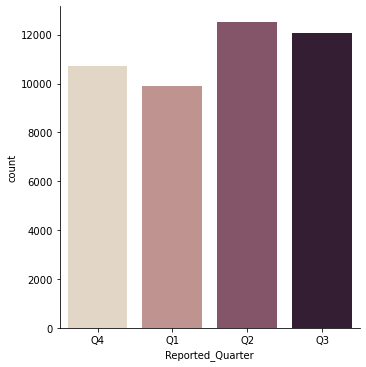

In [264]:
# Police looking to fulfill yearly quotas???
sns.catplot(x="Reported_Quarter", kind="count", palette="ch:.23", data=X)

In [261]:
testr = X.groupby('Call_Type').Reported_Quarter.value_counts().sort_index()
testr

Call_Type                      Reported_Quarter
911                            Q1                  4094
                               Q2                  5564
                               Q3                  5570
                               Q4                  4864
ALARM CALL (NOT POLICE ALARM)  Q1                    65
                               Q2                    72
                               Q3                    83
                               Q4                    78
Not Reported                   Q1                  3043
                               Q2                  3434
                               Q3                  3512
                               Q4                  3075
ONVIEW                         Q1                  1880
                               Q2                  2604
                               Q3                  2062
                               Q4                  2042
SCHEDULED EVENT (RECURRING)    Q1                     1


<AxesSubplot:xlabel='Call_Type'>

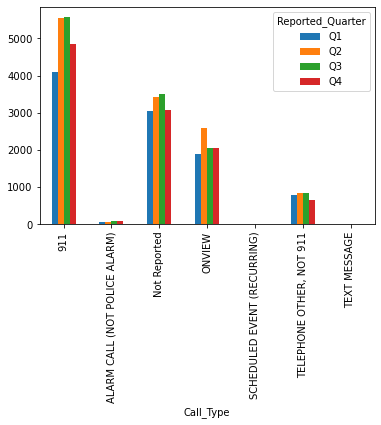

In [263]:
# Could benefit from data on who's actually making the 911 calls
testr.unstack().plot(kind='bar', subplots=False, layout=(2,2))

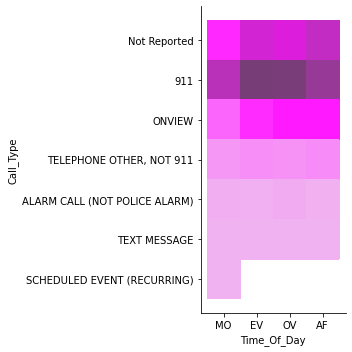

In [251]:
sns.displot(X, x='Time_Of_Day', y="Call_Type", color='purple')

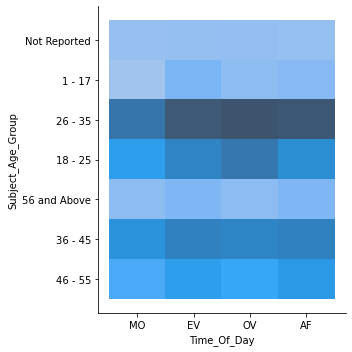

In [248]:
sns.displot(X, x="Time_Of_Day", y='Subject_Age_Group')

In [266]:
X.describe()

,Subject_Age_Group,Subject_Perceived_Race,Call_Type,Time_Of_Day,Reported_Quarter,Reported_Year
count,45196,45196,45196,45196,45196,45196
unique,7,10,7,4,4,6
top,26 - 35,White,911,EV,Q2,2018
freq,15011,22092,20092,12339,12529,8883


In [277]:
stops = pd.get_dummies(X)

In [278]:
stops.head()

,Subject_Age_Group_1 - 17,Subject_Age_Group_18 - 25,Subject_Age_Group_26 - 35,Subject_Age_Group_36 - 45,Subject_Age_Group_46 - 55,Subject_Age_Group_56 and Above,Subject_Age_Group_Not Reported,Subject_Perceived_Race_American Indian or Alaska Native,Subject_Perceived_Race_Asian,Subject_Perceived_Race_Black or African American,...,Reported_Quarter_Q1,Reported_Quarter_Q2,Reported_Quarter_Q3,Reported_Quarter_Q4,Reported_Year_2015,Reported_Year_2016,Reported_Year_2017,Reported_Year_2018,Reported_Year_2019,Reported_Year_2020
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [290]:
stops.to_csv(r'stops.csv', index = False)

In [289]:
y.to_csv(r'labels.csv', index = False)

In [292]:
y.value_counts()

N    34660
Y    10058
-      478
Name: Frisk Flag, dtype: int64

Big Takeaways & Recommendations:
--

- Consider other datasets with more occurrences of "ONVIEW" stops or non-911 calls.
- There is evidence of class imbalance
- There is a signifcant amount of unreported information